# Limpieza y Depurado de los Datos

<hr></hr>

### Librerias

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
from geopy.geocoders import Nominatim
import json
from shapely.geometry import Point

<hr></hr>

### Carga de Datos

In [2]:
df = pd.read_csv('./iFlowDatos.csv')

Vista Superficial del Dataset

In [3]:
df.head(3)

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000


Veamos cuantos valores faltantes hay en cada columna

In [4]:
df.isna().sum()

iddomicilioorden            0
direccion                   0
localidad                   0
InicioHorario1              0
FinHorario1                 0
latitud                    41
longitud                   41
cliente                     0
mes                         0
Bultos                      0
Peso                        0
Unidades                    0
InicioVisitaPlanificado     0
FinVisitaPlanificado        0
InicioVisitaReal           52
FinVisitaReal              52
dtype: int64

Veamos cuantos valores únicos hay en cada columna

In [5]:
df.nunique()

iddomicilioorden            6593
direccion                   6072
localidad                     44
InicioHorario1                 3
FinHorario1                    3
latitud                     5887
longitud                    5891
cliente                        2
mes                            3
Bultos                      2391
Peso                        8027
Unidades                     377
InicioVisitaPlanificado     6797
FinVisitaPlanificado        6797
InicioVisitaReal           16357
FinVisitaReal              16309
dtype: int64

Veamos las dimensiones del dataset

In [52]:
df.shape

(27484, 16)

Veamos con que tipo fueron cargadas cada una de las columnas del dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27484 entries, 0 to 27483
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iddomicilioorden         27484 non-null  int64  
 1   direccion                27484 non-null  object 
 2   localidad                27484 non-null  object 
 3   InicioHorario1           27484 non-null  int64  
 4   FinHorario1              27484 non-null  int64  
 5   latitud                  27443 non-null  float64
 6   longitud                 27443 non-null  float64
 7   cliente                  27484 non-null  int64  
 8   mes                      27484 non-null  int64  
 9   Bultos                   27484 non-null  float64
 10  Peso                     27484 non-null  float64
 11  Unidades                 27484 non-null  int64  
 12  InicioVisitaPlanificado  27484 non-null  object 
 13  FinVisitaPlanificado     27484 non-null  object 
 14  InicioVisitaReal      

<hr></hr>

### Manejo de Datos Faltantes, Erroneos y Duplicados

La variable "iddomicilioorden" es un identificador del domicilio de entrega, es decir, cada iddomiciolioorden deberia tener una única dirección, localidad, latitud y longitud específica.

Vamos a ver si existen domicilios que tienen más de una dirección, localidad, o coordenadas.

In [6]:
# Obtenemos un dataframe en el que se tiene todas las direcciones de las que existen todos sus datos geográficos
iddomicilioorden_df = (
                        df[['iddomicilioorden','direccion','localidad','latitud','longitud']]
                        .dropna()
                        .drop_duplicates()
                        .reset_index(drop=True)
                      )

# Obtenemos los iddomicilioorden que tienen más de una dirección, localidad, latitud o longitud. 
iddomicilioorden_duplicados = (
                                iddomicilioorden_df[iddomicilioorden_df['iddomicilioorden'].duplicated()]['iddomicilioorden']
                                .tolist()
                              )

# Obtenemos toda la información de los iddomicilioorden duplicados
iddomicilioorden_duplicated_df = (
                                   iddomicilioorden_df[iddomicilioorden_df['iddomicilioorden'].isin(iddomicilioorden_duplicados)]
                                  .reset_index(drop=True)
                                 )

In [7]:
iddomicilioorden_duplicated_df

,iddomicilioorden,direccion,localidad,latitud,longitud
0,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,-34.603996,-58.387488
1,75571,PARANA 465,CAPITAL FEDERAL,-34.603996,-58.387488
2,79502,AV SAN JUAN 3521,CAPITAL,-34.625230,-58.414991
3,79502,AV SAN JUAN 3645,CAPITAL,-34.625230,-58.414991
4,80956,MUÑECAS 1150,CAPITAL FEDERAL,-34.597605,-58.449185
5,80956,AV. LIBERTADOR 3883 LOC 10,CAPITAL FEDERAL,-34.597605,-58.449185
6,81596,AV RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
7,81596,RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
8,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.583381,-58.433890
9,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.580419,-58.436290


In [56]:
# Como se puede observar, en una gran cantidad de filas que comparten el mismo id de domicilio pero difieren en algun dato geográfico, las latitudes y longitudes que poseen son exactamente las mismas, pero la direccion y/o localidad difieren. Estos casos van a ser tratados más adelante mediante la implementación de un archivo geojson obtenido de la pagina del gobierno argentino.

# Mientras tanto, trabajemos con las filas con un mismo id de domicilio pero distintas caracteríticas geográficas.

Primero que nada, veamos aquellas filas en las que se comparte el mismo id de domicilio, pero tienen no solo distinta latitud y longitud, sino que también distinta direccion y localidad. 

In [8]:
# Creamos el filtro de filas en donde el id de domicilio es el mismo y las coordenadas también
duplicated_mask_1 = (
                      iddomicilioorden_duplicated_df
                      .duplicated(subset=['iddomicilioorden', 'latitud', 'longitud'], keep=False)
                    )
# Filtramos las filas que no cumplan con dicha condición
iddomicilioorden_duplicated_2_df = (
                                     iddomicilioorden_duplicated_df[~duplicated_mask_1]
                                     .reset_index(drop=True)
                                   )

# Creamos el filtro de filas en donde el id de domicilio es el mismo y la dirección y localidad también
duplicated_mask_2 = (
                      iddomicilioorden_duplicated_2_df
                      .duplicated(subset=['iddomicilioorden', 'direccion', 'localidad'], keep=False)
                    )

# Filtramos las filas que no cumplan con dicha condición
iddomicilioorden_duplicated_2_df = (
                                     iddomicilioorden_duplicated_2_df[~duplicated_mask_2]
                                     .reset_index(drop=True)
                                   )

In [9]:
iddomicilioorden_duplicated_2_df

,iddomicilioorden,direccion,localidad,latitud,longitud
0,180750,AV. PUEYRREDON 525,CAPITAL FEDERAL,-34.604280,-58.405304
1,180750,HONORIO PUEYRREDON 525,CAPITAL FEDERAL,-34.613684,-58.441025
2,182180,TRELLES 2735,CAPITAL FEDERAL,-34.597447,-58.465748
3,182180,TRELLES 2735,CAPITAL FEDERAL,-34.651309,-58.479949
4,182268,EVA PERON 2930,CAPITAL,-34.642152,-58.458880
5,182268,DELLEPIANE LUIS TTE GRAL 2930,CAPITAL,-34.650680,-58.464896


Existen 6 ids de domicilio que no solo tienen distintas coordenadas, sino que tambien tienen distinta dirección y/o localidad.

- En el caso del id 180750, las direcciones difieren, y las coordenadas también, pero las coordenadas geográficas son correctas para cada una de las direcciones, por lo que vamos a transformar estas dos filas de mismo id de domicilio y vamos a asignar un nuevo id a una de ellas para diferenciarlas.

- En el caso de id 182180, la direccion en ambas filas es la misma pero las coordenadas geográficas difieren. Con una rápida mirada a Google Maps, pudimos verificar cuál de las dos coordenadas era la correcta para la dirección TRELLES 2735, la cual es (-34.597447, -58.465748). Reemplazaremos en la fila con los datos de coordenadas erroneos por los correctos.

- En el caso de id 182268, las direcciones difieren, y las coordenadas también, pero las coordenadas geográficas son correctas para cada una de las direcciones, por lo que vamos a transformar estas dos filas de mismo id de domicilio y vamos a asignar un nuevo id a una de ellas para diferenciarlas.

In [10]:
df_1 = df.copy()

In [11]:
# Hacemos los cambios del primer punto mencionado
condicion = (
    (df_1['iddomicilioorden']   == iddomicilioorden_duplicated_2_df.iloc[0]['iddomicilioorden']) &
    (df_1['direccion']          == iddomicilioorden_duplicated_2_df.iloc[0]['direccion'])        &
    (df_1['localidad']          == iddomicilioorden_duplicated_2_df.iloc[0]['localidad'])        &
    (df_1['latitud']            == iddomicilioorden_duplicated_2_df.iloc[0]['latitud'])          &
    (df_1['longitud']           == iddomicilioorden_duplicated_2_df.iloc[0]['longitud'])
)
nuevo_iddomicilioorden = 99999180750
df_1.loc[condicion, 'iddomicilioorden'] = nuevo_iddomicilioorden

# Hacemos los cambios del segundo punto mencionado
condicion = (
    (df_1['iddomicilioorden']   == iddomicilioorden_duplicated_2_df.iloc[3]['iddomicilioorden']) &
    (df_1['direccion']          == iddomicilioorden_duplicated_2_df.iloc[3]['direccion'])        &
    (df_1['localidad']          == iddomicilioorden_duplicated_2_df.iloc[3]['localidad'])        &
    (df_1['latitud']            == iddomicilioorden_duplicated_2_df.iloc[3]['latitud'])          &
    (df_1['longitud']           == iddomicilioorden_duplicated_2_df.iloc[3]['longitud'])
)
nuevo_latitud  = -34.597447
nuevo_longitud = -58.465748
df_1.loc[condicion, 'latitud'] = nuevo_latitud
df_1.loc[condicion, 'longitud'] = nuevo_longitud

# Hacemos los cambios del tercer punto mencionado
condicion = (
    (df_1['iddomicilioorden']   == iddomicilioorden_duplicated_2_df.iloc[4]['iddomicilioorden']) &
    (df_1['direccion']          == iddomicilioorden_duplicated_2_df.iloc[4]['direccion'])        &
    (df_1['localidad']          == iddomicilioorden_duplicated_2_df.iloc[4]['localidad'])        &
    (df_1['latitud']            == iddomicilioorden_duplicated_2_df.iloc[4]['latitud'])          &
    (df_1['longitud']           == iddomicilioorden_duplicated_2_df.iloc[4]['longitud'])
)
nuevo_iddomicilioorden = 99999182268
df_1.loc[condicion, 'iddomicilioorden'] = nuevo_iddomicilioorden

Segundo, veamos aquellas filas en las que se comparte el mismo id de domicilio y coordenadas, pero tienen ladirecciones distintas.

In [12]:
# Obtenemos un dataframe en el que se tiene todas las direcciones de las que existen todos sus datos geográficos
iddomicilioorden_df_1 = (
                        df_1[['iddomicilioorden','direccion','localidad','latitud','longitud']]
                        .dropna()
                        .drop_duplicates()
                        .reset_index(drop=True)
                      )

# Obtenemos los iddomicilioorden que tienen más de una dirección, localidad, latitud o longitud. 
iddomicilioorden_duplicados = (
                                iddomicilioorden_df_1[iddomicilioorden_df_1['iddomicilioorden'].duplicated()]['iddomicilioorden']
                                .tolist()
                              )

# Obtenemos toda la información de los iddomicilioorden duplicados
iddomicilioorden_duplicated_df_1 = (
                                   iddomicilioorden_df_1[iddomicilioorden_df_1['iddomicilioorden'].isin(iddomicilioorden_duplicados)]
                                  .reset_index(drop=True)
                                 )

In [14]:
# Creamos el filtro de filas en donde el id de domicilio es el mismo y la dirección también
duplicated_mask = (
                      iddomicilioorden_duplicated_df_1
                      .duplicated(subset=['iddomicilioorden', 'direccion'], keep=False)
                    )

# Filtramos las filas que no cumplan con dicha condición
iddomicilioorden_duplicated_df_1 = (
                                     iddomicilioorden_duplicated_df_1[~duplicated_mask]
                                     .reset_index(drop=True)
                                   )

In [15]:
iddomicilioorden_duplicated_df_1

,iddomicilioorden,direccion,localidad,latitud,longitud
0,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,-34.603996,-58.387488
1,75571,PARANA 465,CAPITAL FEDERAL,-34.603996,-58.387488
2,79502,AV SAN JUAN 3521,CAPITAL,-34.625230,-58.414991
3,79502,AV SAN JUAN 3645,CAPITAL,-34.625230,-58.414991
4,80956,MUÑECAS 1150,CAPITAL FEDERAL,-34.597605,-58.449185
5,80956,AV. LIBERTADOR 3883 LOC 10,CAPITAL FEDERAL,-34.597605,-58.449185
6,81596,AV RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
7,81596,RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086
8,146201,AV. MONROE 1991,CAPITAL FEDERAL,-34.555979,-58.456187
9,146201,AV. MONROE 1999,CAPITAL FEDERAL,-34.555979,-58.456187


En todos estos casos, en todas las filas que comparten el mismo id de domicilio, todas comaprten las mismas coordenadas pero difieren en la direccion.

Vamos a intentar encontrar la dirección correcta para cada id de domicilio en base a las coordenadas y corregir las filas con datos incorrectos. Para ello, utlizando la ayuda de ChatGPT, pudimos encontrar una libreria que nos otorga una estimación confiable sobre la dirección a la cual hace referencia cada coordenada de cada fila. En base a la dirección que nos otorga esta función, vamos a filtrar las direcciones correctas de las incorrectas, y así podremos corregir los datos erroneos.

In [16]:
# Inicializa el geocodificador
geolocator = Nominatim(user_agent="mi_aplicacion")

# Función para obtener la dirección a partir de coordenadas
def obtener_direccion(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.address if location else None
    except Exception as e:
        print(f"Error al obtener dirección: {e}")
        return None

# Aplicar la función a cada fila del DataFrame
iddomicilioorden_duplicated_df_1['direccion_nueva'] = iddomicilioorden_duplicated_df_1.apply(lambda row: obtener_direccion(row['latitud'], row['longitud']), axis=1)

# Función para obtener los valores antes de la segunda coma
def obtener_valores_antes_segunda_coma(s):
    # Separar por comas y seleccionar los elementos antes de la segunda coma
    return ','.join(s.split(',')[:2])

# Aplicar la función a la columna 'direccion_nueva'
iddomicilioorden_duplicated_df_1['direccion_nueva'] = iddomicilioorden_duplicated_df_1['direccion_nueva'].apply(obtener_valores_antes_segunda_coma)

# Mostrar el DataFrame con direcciones
iddomicilioorden_duplicated_df_1

,iddomicilioorden,direccion,localidad,latitud,longitud,direccion_nueva
0,75571,AV. CORRIENTES 1469,CAPITAL FEDERAL,-34.603996,-58.387488,"1467, Avenida Corrientes"
1,75571,PARANA 465,CAPITAL FEDERAL,-34.603996,-58.387488,"1467, Avenida Corrientes"
2,79502,AV SAN JUAN 3521,CAPITAL,-34.625230,-58.414991,"3515, Avenida San Juan"
3,79502,AV SAN JUAN 3645,CAPITAL,-34.625230,-58.414991,"3515, Avenida San Juan"
4,80956,MUÑECAS 1150,CAPITAL FEDERAL,-34.597605,-58.449185,"1150, Muñecas"
5,80956,AV. LIBERTADOR 3883 LOC 10,CAPITAL FEDERAL,-34.597605,-58.449185,"1150, Muñecas"
6,81596,AV RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086,"4987, Avenida Rivadavia"
7,81596,RIVADAVIA 4975,CAPITAL FEDERAL,-34.618052,-58.436086,"4987, Avenida Rivadavia"
8,146201,AV. MONROE 1991,CAPITAL FEDERAL,-34.555979,-58.456187,"1999, Monroe"
9,146201,AV. MONROE 1999,CAPITAL FEDERAL,-34.555979,-58.456187,"1999, Monroe"


Vamos a tomar como válidas aquellas direcciones de la columna "direccion" que sean más próximas a las direcciones de la columna "direccion_nueva" y corregiremos aquellas direcciones incorrectas.

In [17]:
ids_correctos = [0,2,4,6,9,10,13,14,16,18]

orden_1 = iddomicilioorden_duplicated_df_1.iloc[ids_correctos]

for i in range(len(orden_1)):
    condicion = (
        (df_1['iddomicilioorden']   == orden_1.iloc[i]['iddomicilioorden']) &
        (df_1['localidad']          == orden_1.iloc[i]['localidad'])        &
        (df_1['latitud']            == orden_1.iloc[i]['latitud'])          &
        (df_1['longitud']           == orden_1.iloc[i]['longitud'])
    )
    nuevo_direccion = orden_1.iloc[i]['direccion']
    df_1.loc[condicion, 'direccion'] = nuevo_direccion

Tercero, veamos aquellas filas en las que se comparte el mismo id de domicilio y direccion, pero tienen las coordenadas distintas.

In [18]:
# Obtenemos un dataframe en el que se tiene todas las direcciones de las que existen todos sus datos geográficos
iddomicilioorden_df_1 = (
                        df_1[['iddomicilioorden','direccion','localidad','latitud','longitud']]
                        .dropna()
                        .drop_duplicates()
                        .reset_index(drop=True)
                      )

# Obtenemos los iddomicilioorden que tienen más de una dirección, localidad, latitud o longitud. 
iddomicilioorden_duplicados = (
                                iddomicilioorden_df_1[iddomicilioorden_df_1['iddomicilioorden'].duplicated()]['iddomicilioorden']
                                .tolist()
                              )

# Obtenemos toda la información de los iddomicilioorden duplicados
iddomicilioorden_duplicated_df_1 = (
                                   iddomicilioorden_df_1[iddomicilioorden_df_1['iddomicilioorden'].isin(iddomicilioorden_duplicados)]
                                  .reset_index(drop=True)
                                 )

In [19]:
# Creamos el filtro de filas en donde el id de domicilio es el mismo y la dirección también
duplicated_mask = (
                      iddomicilioorden_duplicated_df_1
                      .duplicated(subset=['iddomicilioorden', 'direccion'], keep=False)
                    )

# Filtramos las filas que no cumplan con dicha condición
iddomicilioorden_duplicated_df_1 = (
                                     iddomicilioorden_duplicated_df_1[duplicated_mask]
                                     .reset_index(drop=True)
                                   )

In [20]:
iddomicilioorden_duplicated_df_1

,iddomicilioorden,direccion,localidad,latitud,longitud
0,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.583381,-58.433890
1,98189,COSTA RICA 5514,CAPITAL FEDERAL,-34.580419,-58.436290
2,148671,MERCEDES A DE ANCHORENA 477,SAN ISIDRO,-34.485321,-58.571307
3,148671,MERCEDES A DE ANCHORENA 477,SAN ISIDRO,-34.466503,-58.509119
4,163957,DR ENRIQUE PINOCHETO 404,CAPITAL FEDERAL,0.000000,0.000000
5,163957,DR ENRIQUE PINOCHETO 404,CAPITAL FEDERAL,-34.628195,-58.370877
6,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,-34.463951,-58.612680
7,173085,CTRO COM EUZKAL PLAZA BANCALARI 1200,GENERAL PACHECO,0.000000,0.000000
8,175912,AV BELGRANO 2297,DON TORCUATO,-34.847165,-58.376844
9,175912,AV BELGRANO 2297,DON TORCUATO,-34.480320,-58.632780


En este caso, vamos a buscar manualmente aquellas coordenadas que se adecuan a las direcciones ya que los datos de las localidades no son lo suficientemente exactos como para poder ahcer una funcion con geopy como para estimar las coordenadas de dicha dirección.

In [21]:
ids_correctos = [0,3,5,6,9,10,13,15,17,18,22,23]

orden_1 = iddomicilioorden_duplicated_df_1.iloc[ids_correctos]

for i in range(len(orden_1)):
    condicion = (
        (df_1['iddomicilioorden']   == orden_1.iloc[i]['iddomicilioorden']) &
        (df_1['localidad']          == orden_1.iloc[i]['localidad'])        &
        (df_1['direccion']          == orden_1.iloc[i]['direccion'])
    )
    nuevo_latitud  = orden_1.iloc[i]['latitud']
    nuevo_longitud = orden_1.iloc[i]['longitud']
    df_1.loc[condicion, 'latitud']  = nuevo_latitud
    df_1.loc[condicion, 'longitud'] = nuevo_longitud

Ahora miremos aquellas filas en las que no se encuentran sus coordenadas

In [22]:
# Obtenemos la lista de los ids de domicilio que no poseen coordenadas
iddomicilioorden_na = list(df_1[df_1['latitud'].isna()]['iddomicilioorden'])

In [23]:
# Creamos la siguiente funcion para ver si en aquellas direcciones en donde faltan sus latitudes,
# si dichas coordenadas existen en algun otro lado del dataframe, entonces estas seran asignadas
# a aquellas filas en donde faltan dichos valores.
def fill_missing_coordinates(row):
    iddomicilioorden = row['iddomicilioorden']
    latitud          = row['latitud']
    longitud         = row['longitud']
    # Si el ID se encuentra en los ID sin coordenadas, pero dicho ID está en otra fila que si tiene coordenadas
    # entonces que copie las coordenadas en la fila que si estan y las pegue en la que no esta.
    if (iddomicilioorden in iddomicilioorden_na) and (iddomicilioorden in iddomicilioorden_df_2['iddomicilioorden'].tolist()):
        if pd.isna(latitud): 
            row['latitud']  = float(iddomicilioorden_df_2[iddomicilioorden_df_2['iddomicilioorden'] == iddomicilioorden]['latitud'])
        if pd.isna(longitud):
            row['longitud'] = float(iddomicilioorden_df_2[iddomicilioorden_df_2['iddomicilioorden'] == iddomicilioorden]['longitud'])
    return row

# Recordemos que iddomicilioorden_df es un un dataframe en el que se tiene todas las direcciones de 
# las que existen sus coordenadas

df_2 = df_1.copy()

iddomicilioorden_df_2 = df_2[['iddomicilioorden','direccion','localidad','latitud','longitud']].dropna().drop_duplicates(subset=['iddomicilioorden']).reset_index(drop=True)

df_2 = df_2.apply(fill_missing_coordinates, axis=1)

print(df_1.isna().sum()[['latitud','longitud']])
print(df_2.isna().sum()[['latitud','longitud']])

C:\Users\anapa\AppData\Local\Temp\ipykernel_5656\3095351505.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  row['latitud']  = float(iddomicilioorden_df_2[iddomicilioorden_df_2['iddomicilioorden'] == iddomicilioorden]['latitud'])
C:\Users\anapa\AppData\Local\Temp\ipykernel_5656\3095351505.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  row['longitud'] = float(iddomicilioorden_df_2[iddomicilioorden_df_2['iddomicilioorden'] == iddomicilioorden]['longitud'])


latitud     41
longitud    41
dtype: int64
latitud     19
longitud    19
dtype: int64


De esta forma, se pudieron encontrar las coordenadas de 22 domicilios.

En aquellas direcciones en las que no se pudieron obtener sus coordenadas, son direcciones en las que no se tienen sus coordenadas en ningun lado del dataframe. Por lo que las buscaremos manualmente.

In [24]:
# Veamos aquellas direcciones en las que siguen faltando sus las coordenadas
missing_coordinates = df_2[df_2['latitud'].isna()]
missing_coordinates

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24663,167030,JOSE HERNANDEZ 1777,CAPITAL,901,1401,NaN,NaN,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
26567,176717,AV. CORRIENTES 5941,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
26579,176731,VEDIA 3600,CAPITAL,901,1401,NaN,NaN,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
26968,178780,AV. LA PLATA 19,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
26993,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,NaN,NaN,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000
26994,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,NaN,NaN,20,7,9.000000,37.80000,9,2024-07-27 12:33:00.000,2024-07-27 12:33:00.000,2024-07-27 16:37:00.000,2024-07-27 16:37:00.000
27118,179593,AV. CORDOBA 2417,CAPITAL FEDERAL,901,1401,NaN,NaN,20,6,9.000000,83.40000,9,2024-06-11 12:48:00.000,2024-06-11 12:48:00.000,2024-06-11 17:26:00.000,2024-06-11 17:26:00.000
27127,179618,HUMBERTO PRIMO 2162 PB,PILAR,901,1401,NaN,NaN,20,6,3.000000,3.00000,3,2024-06-12 12:05:00.000,2024-06-12 12:05:00.000,2024-06-12 13:01:58.000,2024-06-12 13:11:37.000
27129,179620,PEDRO GOYENA 890,CAPITAL FEDERAL,901,1401,NaN,NaN,20,6,10.000000,8.00000,10,2024-06-12 12:33:00.000,2024-06-12 12:33:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000
27130,179621,JOSE PEDRO VARELA 5185,CAPITAL FEDERAL,901,1401,NaN,NaN,20,6,28.000000,0.00000,28,2024-06-12 13:00:00.000,2024-06-12 13:00:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000


In [25]:
# En base a las direcciones y localidades, vamos a intentar encontrar las coordenadas
# de cada una de las direcciones utilizando la pagina de https://www.geoapify.com/geocoding-api/,
# pagina la cual tenemos que pasarle ciertos datos con un formato especifico para que nos devuelva
# un json con las coordenadas de dichas direcciones.
for i in missing_coordinates.index:
    if missing_coordinates.loc[i,'localidad'] in ['CAPITAL','CAPITAL FEDERAL']:
        missing_coordinates.loc[i,'localidad'] = 'Ciudad Autónoma de Buenos Aires'
    print(missing_coordinates.loc[i,'direccion'] + ',' + missing_coordinates.loc[i,'localidad'] + ',' + 'Argentina')
# Copiamos los datos impresos y los mandamos a la pagina para conseguir el json respuesta

JOSE HERNANDEZ 1777,Ciudad Autónoma de Buenos Aires,Argentina
AV. CORRIENTES 5941,Ciudad Autónoma de Buenos Aires,Argentina
VEDIA 3600,Ciudad Autónoma de Buenos Aires,Argentina
AV. LA PLATA 19,Ciudad Autónoma de Buenos Aires,Argentina
ACUÑA DE FIGUEROA 1484,Ciudad Autónoma de Buenos Aires,Argentina
ACUÑA DE FIGUEROA 1484,Ciudad Autónoma de Buenos Aires,Argentina
AV. CORDOBA 2417,Ciudad Autónoma de Buenos Aires,Argentina
HUMBERTO PRIMO 2162 PB,PILAR,Argentina
PEDRO GOYENA 890,Ciudad Autónoma de Buenos Aires,Argentina
JOSE PEDRO VARELA 5185,Ciudad Autónoma de Buenos Aires,Argentina
DONATO ALVAREZ  1687,Ciudad Autónoma de Buenos Aires,Argentina
AV. BELGRANO 3560,Ciudad Autónoma de Buenos Aires,Argentina
GARCIA DE COSSIO 6035,Ciudad Autónoma de Buenos Aires,Argentina
AV GAONA 1246,Ciudad Autónoma de Buenos Aires,Argentina
VALENTIN GOMEZ 3856,Ciudad Autónoma de Buenos Aires,Argentina
MARGARINOS CERVANTES 1599,Ciudad Autónoma de Buenos Aires,Argentina
BUANESS 2635,Ciudad Autónoma de Buenos A

In [26]:
# Luego de pasar el json por chatgpt para reducir drasticamente su tamaño y solo filtrar
# aquella información util sobre cada direccion, guardamos la info en missing_coordinates_found
missing_coordinates_found = [
  {
    "city": "Buenos Aires",
    "district": "Comuna 13",
    "suburb": "Belgrano",
    "street": "José Hernández",
    "housenumber": "1777",
    "lon": -58.4476819,
    "lat": -34.5623127
  },
  {
    "city": "Buenos Aires",
    "district": "Distrito Audiovisual",
    "suburb": "Villa Crespo",
    "street": "Avenida Corrientes",
    "housenumber": "5941",
    "lon": -58.445303585714285,
    "lat": -34.59368126938775
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 12",
    "suburb": "Saavedra",
    "street": "Vedia",
    "housenumber": "3600",
    "lon": -58.48819902361886,
    "lat": -34.54625585
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 6",
    "suburb": "Caballito",
    "street": "Avenida La Plata",
    "housenumber": "19",
    "lon": -58.429294072727274,
    "lat": -34.61552111818182
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 14",
    "suburb": "Palermo",
    "street": "Francisco Acuña de Figueroa",
    "housenumber": "1484",
    "lon": -58.421231581632654,
    "lat": -34.59441431020408
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 14",
    "suburb": "Palermo",
    "street": "Francisco Acuña de Figueroa",
    "housenumber": "1484",
    "lon": -58.421231581632654,
    "lat": -34.59441431020408
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 2",
    "suburb": "Recoleta",
    "street": "Avenida Córdoba",
    "housenumber": "2417",
    "lon": -58.4013560280721,
    "lat": -34.599330508866124
  },
  {
    "city": "Pilar",
    "district": '',
    "suburb": '',
    "street": '',
    "housenumber": '',
    "lon": -58.9141609,
    "lat": -34.4570918
  },
  {
    "city": "Lomas de Zamora",
    "district": '',
    "suburb": '',
    "street": "Pedro Goyena",
    "housenumber": "890",
    "lon": -58.396575725000005,
    "lat": -34.75046960833333
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 11",
    "suburb": "Villa Devoto",
    "street": "José Pedro Varela",
    "housenumber": "5185",
    "lon": -58.52164295714286,
    "lat": -34.61406337142857
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 6",
    "suburb": "Caballito",
    "street": "Alvarez, Donato, Tte. Gral.",
    "housenumber": "1687",
    "lon": -58.46232,
    "lat": -34.60758
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 5",
    "suburb": "Almagro",
    "street": "Avenida Belgrano",
    "housenumber": "3560",
    "lon": -58.416467059183674,
    "lat": -34.61577548571429
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 9",
    "suburb": "Liniers",
    "street": "García de Cossio",
    "housenumber": "6035",
    "lon": -58.51273183469388,
    "lat": -34.64355637755102
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 6",
    "suburb": "Caballito",
    "street": "Avenida Gaona",
    "housenumber": "1246",
    "lon": -58.4471018877551,
    "lat": -34.608131118367346
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 5",
    "suburb": "Almagro",
    "street": "Valentín Gómez",
    "housenumber": "3856",
    "lon": -58.41905557142857,
    "lat": -34.604501142857146
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 11",
    "suburb": "Villa General Mitre",
    "street": "Magarinos Cervantes, A.",
    "housenumber": "1599",
    "lon": -58.463447,
    "lat": -34.605351
  },
  {
    "city": "Buenos Aires",
    "district": '',
    "suburb": '',
    "street": '',
    "housenumber": '',
    "lon": -58.454595,
    "lat": -34.607357
  },
  {
    "city": "San Justo",
    "district": "Partido de La Matanza",
    "suburb": '',
    "street": "La Paz",
    "housenumber": "2701",
    "lon": -58.576847,
    "lat": -34.669012
  },
  {
    "city": "Buenos Aires",
    "district": "Comuna 15",
    "suburb": "Villa Crespo",
    "street": "Castillo",
    "housenumber": "767",
    "lon": -58.43631412244898,
    "lat": -34.5930833877551
  }
]

In [27]:
# Vamos asignando las coordenadas encontradas de cada direccion
c = 0
for i in missing_coordinates.index:
  missing_coordinates.loc[i,'latitud']  = missing_coordinates_found[c]['lat']
  missing_coordinates.loc[i,'longitud'] = missing_coordinates_found[c]['lon']
  c += 1
fixed_missing_coordinates = missing_coordinates.copy()

# Asignamos las coordenadas encontradas en la base de datos
for i in fixed_missing_coordinates.index:
  df_2.loc[i,'latitud']  = fixed_missing_coordinates.loc[i,'latitud']
  df_2.loc[i,'longitud'] = fixed_missing_coordinates.loc[i,'longitud']
df_2.iloc[fixed_missing_coordinates.index]

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24663,167030,JOSE HERNANDEZ 1777,CAPITAL,901,1401,-34.562313,-58.447682,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
26567,176717,AV. CORRIENTES 5941,CAPITAL FEDERAL,901,1401,-34.593681,-58.445304,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
26579,176731,VEDIA 3600,CAPITAL,901,1401,-34.546256,-58.488199,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
26968,178780,AV. LA PLATA 19,CAPITAL FEDERAL,901,1401,-34.615521,-58.429294,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
26993,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,-34.594414,-58.421232,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000
26994,178939,ACUÑA DE FIGUEROA 1484,CAPITAL FEDERAL,901,1401,-34.594414,-58.421232,20,7,9.000000,37.80000,9,2024-07-27 12:33:00.000,2024-07-27 12:33:00.000,2024-07-27 16:37:00.000,2024-07-27 16:37:00.000
27118,179593,AV. CORDOBA 2417,CAPITAL FEDERAL,901,1401,-34.599331,-58.401356,20,6,9.000000,83.40000,9,2024-06-11 12:48:00.000,2024-06-11 12:48:00.000,2024-06-11 17:26:00.000,2024-06-11 17:26:00.000
27127,179618,HUMBERTO PRIMO 2162 PB,PILAR,901,1401,-34.457092,-58.914161,20,6,3.000000,3.00000,3,2024-06-12 12:05:00.000,2024-06-12 12:05:00.000,2024-06-12 13:01:58.000,2024-06-12 13:11:37.000
27129,179620,PEDRO GOYENA 890,CAPITAL FEDERAL,901,1401,-34.750470,-58.396576,20,6,10.000000,8.00000,10,2024-06-12 12:33:00.000,2024-06-12 12:33:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000
27130,179621,JOSE PEDRO VARELA 5185,CAPITAL FEDERAL,901,1401,-34.614063,-58.521643,20,6,28.000000,0.00000,28,2024-06-12 13:00:00.000,2024-06-12 13:00:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000


In [28]:
df_2.isna().sum()

iddomicilioorden            0
direccion                   0
localidad                   0
InicioHorario1              0
FinHorario1                 0
latitud                     0
longitud                    0
cliente                     0
mes                         0
Bultos                      0
Peso                        0
Unidades                    0
InicioVisitaPlanificado     0
FinVisitaPlanificado        0
InicioVisitaReal           52
FinVisitaReal              52
dtype: int64

Logramos obtener todas las coordenadas faltantes del dataset!

Ahora vamos a trabajar con la columna "localidad".

Observando la columna de localidad, podemos ver que hay muchas inconsistencias: desde distintas formas de expresar una misma localidad, cómo tambien la falta de estandarización de los valores: a veces se pone el nombre de una localidad, otras veces de un partido, otras el nombre de la provincia, etc.

In [77]:
df_2['localidad'].unique()

array(['CAPITAL', 'CAPITAL FEDERAL', 'VILLA URQUIZA', 'FLORES',
       'Villa Ortúzar', 'SAN FERNANDO', 'VICTORIA', 'BECCAR',
       'SAN ISIDRO', 'TIGRE', 'VIRREYES', 'MARTINEZ', 'BUENOS AIRES',
       'SIN LOCALIDAD', 'VICENTE LOPEZ', 'OLIVOS', 'FLORIDA', 'MUNRO',
       'FLORESTA', 'BOULOGNE', 'ACASSUSO', 'LA LUCILA', 'VILLA TRINIDAD',
       'VILLA ADELINA', 'BENAVIDEZ', 'La Plata', 'Huanchilla Sud',
       'GENERAL PACHECO', 'El Talar', 'Buenos Aires', 'SAN MIGUEL',
       'QUILMES', 'SAN MARTIN', 'DON TORCUATO', 'SAN JUSTO', 'Carilo',
       'Ciudad Autónoma de Buenos Aires', 'Santos Lugares',
       'MANUEL GONNET', 'PILAR', 'SAN VICENTE', 'Flores', 'HUDSON',
       'WILDE'], dtype=object)

Con el fin de mejorar la precisión de los datos de la columna localidad, utilizando la pagina del gobierno:

https://datos.gob.ar/dataset/jgm-servicio-normalizacion-direcciones-unidades-territoriales-argentina/archivo/jgm_8.21

Asignaremos la localidad correcta que le corresponde a cada dirección en base a sus coordenadas.

In [29]:
# Cargamos el archivo GeoJSON de las localidades de Argentina
localidades_geojson = gpd.read_file("./limites-partidos/localidades.geojson")

# Convertimos las coordenadas a geometrías de puntos (Para poder ver si el punto de coordenadas
# pertenece a algun poligono que representa alguna localidad)
geometry = [Point(xy) for xy in zip(df_2['longitud'], df_2['latitud'])]
df_puntos = gpd.GeoDataFrame(df_2, geometry=geometry)

# Nos aseguramos de que ambos GeoDataFrames estén en el mismo sistema de coordenadas (CRS)
df_puntos = df_puntos.set_crs(localidades_geojson.crs, allow_override=True)

# Hacemos un sjoin_nearest para asignar la localidad más cercana a cada punto
df_3 = gpd.sjoin_nearest(df_puntos, localidades_geojson, how="left")
df_3.head()

c:\Users\anapa\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,index_right,id,nombre,fuente,provincia,departamento,municipio,localidad_censal,categoria,centroide
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,4005,0209101001,Belgrano,INDEC,"{ ""id"": ""02"", ""nombre"": ""Ciudad Autónoma de Bu...","{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."


In [30]:
df_3.provincia.unique()

array(['{ "id": "02", "nombre": "Ciudad Autónoma de Buenos Aires" }',
       '{ "id": "06", "nombre": "Buenos Aires" }',
       '{ "id": "50", "nombre": "Mendoza" }'], dtype=object)

In [31]:
mapeo = {
    '{ "id": "02", "nombre": "Ciudad Autónoma de Buenos Aires" }': "Ciudad Autónoma de Buenos Aires",
    '{ "id": "06", "nombre": "Buenos Aires" }': "Buenos Aires",
    '{ "id": "50", "nombre": "Mendoza" }': "Mendoza",
    np.nan: None
}
df_3['provincia'] = df_3['provincia'].map(mapeo)
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,index_right,id,nombre,fuente,provincia,departamento,municipio,localidad_censal,categoria,centroide
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""022091"", ""nombre"": ""Comuna 13"" }","{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."


In [82]:
df_3.municipio.unique()

array(['{ "id": "022091", "nombre": "Comuna 13" }',
       '{ "id": "022077", "nombre": "Comuna 11" }',
       '{ "id": "022070", "nombre": "Comuna 10" }',
       '{ "id": "022084", "nombre": "Comuna 12" }',
       '{ "id": "022098", "nombre": "Comuna 14" }',
       '{ "id": "022063", "nombre": "Comuna 9" }',
       '{ "id": "060840", "nombre": "Tres de Febrero" }',
       '{ "id": "022049", "nombre": "Comuna 7" }',
       '{ "id": "022105", "nombre": "Comuna 15" }',
       '{ "id": "060371", "nombre": "General San Martín" }',
       '{ "id": "022014", "nombre": "Comuna 2" }',
       '{ "id": "060749", "nombre": "San Fernando" }',
       '{ "id": "060756", "nombre": "San Isidro" }',
       '{ "id": "022007", "nombre": "Comuna 1" }',
       '{ "id": "022021", "nombre": "Comuna 3" }',
       '{ "id": "060805", "nombre": "Tigre" }',
       '{ "id": "022056", "nombre": "Comuna 8" }',
       '{ "id": "022035", "nombre": "Comuna 5" }',
       '{ "id": "060861", "nombre": "Vicente López" }',


In [32]:
df_3['municipio'] = df_3['municipio'].apply(lambda x: json.loads(x)['nombre'])
df_3.head()

,iddomicilioorden,direccion,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,...,index_right,id,nombre,fuente,provincia,departamento,municipio,localidad_censal,categoria,centroide
0,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.516667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
1,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.866667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
2,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,5,2.400000,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
3,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,1.800000,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."
4,74956,VIDAL 2044,CAPITAL,901,1401,-34.564779,-58.459956,70,6,2.116667,...,4005,0209101001,Belgrano,INDEC,Ciudad Autónoma de Buenos Aires,"{ ""id"": ""02091"", ""nombre"": ""Comuna 13"" }",Comuna 13,"{ ""id"": ""02000010"", ""nombre"": ""Ciudad Autónoma...",Entidad,"{ ""lon"": -58.456554607425197, ""lat"": -34.56207..."


In [33]:
df_3['localidad'] = df_3['nombre']

df_3 = df_3[['iddomicilioorden',
             'direccion',
             'provincia',
             'municipio',
             'localidad',
             'InicioHorario1',
             'FinHorario1',
             'latitud',
             'longitud',
             'cliente',
             'mes',
             'Bultos',
             'Peso',
             'Unidades',
             'InicioVisitaPlanificado',
             'FinVisitaPlanificado',
             'InicioVisitaReal',
             'FinVisitaReal',
            ]].copy()
df_3.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23 12:06:00.000,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10 12:05:00.000,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30 12:03:00.000,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13 12:14:00.000,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27 12:27:00.000,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000


Veamos como quedaron aquellas filas en las que previamente faltaban las coordenadas

In [34]:
# Veamos como quedaron aquellas filas en las que previamente faltaban las coordenadas
df_3.iloc[fixed_missing_coordinates.index]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
24663,167030,JOSE HERNANDEZ 1777,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.562313,-58.447682,70,5,2.435713,10.78625,55,2024-05-21 12:01:00.000,2024-05-21 12:01:00.000,2024-05-21 11:42:07.000,2024-05-21 11:51:32.000
26567,176717,AV. CORRIENTES 5941,Ciudad Autónoma de Buenos Aires,Comuna 15,Villa Crespo,901,1401,-34.593681,-58.445304,20,5,2.000000,19.50000,2,2024-05-11 12:02:00.000,2024-05-11 12:02:00.000,2024-05-11 10:59:08.000,2024-05-11 11:01:08.000
26579,176731,VEDIA 3600,Ciudad Autónoma de Buenos Aires,Comuna 12,Saavedra,901,1401,-34.546256,-58.488199,70,5,5.500000,50.22300,18,2024-05-13 12:01:00.000,2024-05-13 12:01:00.000,2024-05-13 15:38:00.000,2024-05-13 15:38:00.000
26968,178780,AV. LA PLATA 19,Ciudad Autónoma de Buenos Aires,Comuna 6,Caballito,901,1401,-34.615521,-58.429294,20,5,11.000000,0.00000,11,2024-05-31 12:30:00.000,2024-05-31 12:30:00.000,2024-05-31 16:02:00.000,2024-05-31 16:02:00.000
26993,178939,ACUÑA DE FIGUEROA 1484,Ciudad Autónoma de Buenos Aires,Comuna 5,Almagro,901,1401,-34.594414,-58.421232,20,5,3.000000,39.00000,3,2024-06-01 12:28:00.000,2024-06-01 12:28:00.000,2024-06-01 15:29:00.000,2024-06-01 15:29:00.000
26994,178939,ACUÑA DE FIGUEROA 1484,Ciudad Autónoma de Buenos Aires,Comuna 5,Almagro,901,1401,-34.594414,-58.421232,20,7,9.000000,37.80000,9,2024-07-27 12:33:00.000,2024-07-27 12:33:00.000,2024-07-27 16:37:00.000,2024-07-27 16:37:00.000
27118,179593,AV. CORDOBA 2417,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.599331,-58.401356,20,6,9.000000,83.40000,9,2024-06-11 12:48:00.000,2024-06-11 12:48:00.000,2024-06-11 17:26:00.000,2024-06-11 17:26:00.000
27127,179618,HUMBERTO PRIMO 2162 PB,Buenos Aires,Pilar,Pilar,901,1401,-34.457092,-58.914161,20,6,3.000000,3.00000,3,2024-06-12 12:05:00.000,2024-06-12 12:05:00.000,2024-06-12 13:01:58.000,2024-06-12 13:11:37.000
27129,179620,PEDRO GOYENA 890,Buenos Aires,Lomas de Zamora,Banfield,901,1401,-34.750470,-58.396576,20,6,10.000000,8.00000,10,2024-06-12 12:33:00.000,2024-06-12 12:33:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000
27130,179621,JOSE PEDRO VARELA 5185,Ciudad Autónoma de Buenos Aires,Comuna 10,Villa Real,901,1401,-34.614063,-58.521643,20,6,28.000000,0.00000,28,2024-06-12 13:00:00.000,2024-06-12 13:00:00.000,2024-06-12 16:12:00.000,2024-06-12 16:12:00.000


Ahora trabajaremos con las columnas InicioHorario1 y FinHorario1

In [35]:
df_3[['InicioHorario1','FinHorario1']].groupby('InicioHorario1').value_counts()

InicioHorario1  FinHorario1
0               2359               1
900             1400               6
901             1401           27477
Name: count, dtype: int64

In [36]:
df_3[df_3.InicioHorario1!=901]

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,InicioVisitaPlanificado,FinVisitaPlanificado,InicioVisitaReal,FinVisitaReal
4432,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,5,1.0,7.0,2,2024-05-08 12:17:00.000,2024-05-08 12:17:00.000,2024-05-08 16:32:00.000,2024-05-08 16:32:00.000
4433,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,5,1.5,10.5,3,2024-05-22 12:25:00.000,2024-05-22 12:25:00.000,2024-05-22 12:42:08.000,2024-05-22 12:47:08.000
4434,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,6,4.0,28.0,8,2024-06-12 12:08:00.000,2024-06-12 12:08:00.000,2024-06-12 15:18:00.000,2024-06-12 15:18:00.000
4435,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,6,2.0,14.0,4,2024-06-05 12:25:00.000,2024-06-05 12:25:00.000,2024-06-05 12:28:35.000,2024-06-05 12:31:35.000
4436,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,7,2.0,14.0,4,2024-07-30 12:34:00.000,2024-07-30 12:34:00.000,2024-07-30 17:18:00.000,2024-07-30 17:18:00.000
4437,76871,CARLOS CALVO 4317 lunes a viernes de 9.00 a 14.00,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,900,1400,-34.624995,-58.426184,70,7,2.0,14.0,4,2024-07-16 12:15:00.000,2024-07-16 12:15:00.000,2024-07-16 12:09:49.000,2024-07-16 12:10:49.000
22154,133323,NEUQUEN 2912,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa Santa Rita,0,2359,-34.621313,-58.474048,20,7,3.0,32.5,3,2024-07-05 12:40:00.000,2024-07-05 12:40:00.000,2024-07-05 11:13:17.000,2024-07-05 11:23:38.000


Al ser tan pocas las observaciones que tienen horarios distintos a 901 y 1401, vamos a asumir que los valores que difieren de esos valores son distintos debido a una imprecisión, por lo que los reemplazaremos por 901 y 1401. 

In [38]:
df_4 = df_3.copy()
df_4['InicioHorario1'] = 901
df_4['FinHorario1'] = 1401
df_4[['InicioHorario1','FinHorario1']].drop_duplicates()

,InicioHorario1,FinHorario1
0,901,1401


Observando las columnas InicioVisitaPlanificado y FinVisitaPlanificado, tenemos la sospecha de que son dos columnas iguales. Veamos si eso es cierto.

In [39]:
print(df_4['InicioVisitaPlanificado'].equals(df_4['FinVisitaPlanificado']))

True


Como son iguales, vamos a eliminar una de ellas y la otra la nombraremos VisitaPlanificada.

In [40]:
df_4 = df_4.drop(columns=['FinVisitaPlanificado'])
df_4 = df_4.rename(columns={'InicioVisitaPlanificado':'VisitaPlanificada'})
df_4.columns

Index(['iddomicilioorden', 'direccion', 'provincia', 'municipio', 'localidad',
       'InicioHorario1', 'FinHorario1', 'latitud', 'longitud', 'cliente',
       'mes', 'Bultos', 'Peso', 'Unidades', 'VisitaPlanificada',
       'InicioVisitaReal', 'FinVisitaReal'],
      dtype='object')

Para mayor comodidad a la hora de analizar el dataset, separaremos la hora y fecha de las columnas que indican un momento en el tiempo.

In [41]:
df_5 = df_4.copy()

df_5['VisitaPlanificadaFecha']  = pd.to_datetime(df_5['VisitaPlanificada']).dt.date
df_5['VisitaPlanificadaHora']   = pd.to_datetime(df_5['VisitaPlanificada']).dt.time
df_5['InicioVisitaFecha']       = pd.to_datetime(df_5['InicioVisitaReal']).dt.date
df_5['InicioVisitaHora']        = pd.to_datetime(df_5['InicioVisitaReal']).dt.time
df_5['FinVisitaFecha']          = pd.to_datetime(df_5['FinVisitaReal']).dt.date
df_5['FinVisitaHora']           = pd.to_datetime(df_5['FinVisitaReal']).dt.time

df_5 = df_5.drop(columns=['VisitaPlanificada','InicioVisitaReal','FinVisitaReal'])
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,InicioVisitaFecha,InicioVisitaHora,FinVisitaFecha,FinVisitaHora
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,2024-05-23,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,2024-05-10,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,2024-05-30,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13,12:14:00,2024-06-13,13:32:55,2024-06-13,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27,12:27:00,2024-06-27,15:36:00,2024-06-27,15:36:00


Como InicioVisitaFecha y FinVisitaFecha indican exactamente el mismo día, vamos a eliminar una de estas columnas y nombraremos a la otra VisitaFecha

In [42]:
print(df_5['InicioVisitaFecha'].equals(df_5['FinVisitaFecha']))

True


In [43]:
df_5 = df_5.drop(columns=['FinVisitaFecha'])
df_5 = df_5.rename(columns={'InicioVisitaFecha':'VisitaFecha',
                            'InicioVisitaHora' :'VisitaHora_Inicio',
                            'FinVisitaHora'    :'VisitaHora_Fin'})
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,1.800000,14.040,28,2024-06-13,12:14:00,2024-06-13,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,6,2.116667,14.377,31,2024-06-27,12:27:00,2024-06-27,15:36:00,15:36:00


Vamos a ver si la columna mes tiene valores correctos. Para ello, vamos a crear una nueva columna mes en la que se pondrá el mes en el que se realizo cada visita y vamos a verificar si ambas columnas son iguales.

In [44]:
df_5['VisitaFecha']             = pd.to_datetime(df_5['VisitaFecha'])
df_5['VisitaPlanificadaFecha']  = pd.to_datetime(df_5['VisitaPlanificadaFecha'])
df_5['mes_nuevo'] = df_5['VisitaFecha'].dt.month
df_5.head(3)

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,mes,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin,mes_nuevo
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,14:14:53,5.0
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,16:43:00,5.0
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,5,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,09:50:08,5.0


In [45]:
# Podemos observar que ambas columnas no son iguales, por lo que para mayor confianza utilizaremos la 
# columna que creamos en base a las fechas
print(df_5['mes'].unique())
print(df_5['mes_nuevo'] .unique())

[5 6 7]
[ 5.  6.  7.  8. nan]


In [46]:
df_5 = df_5.drop(columns=['mes'])
df_5 = df_5.rename(columns={'mes_nuevo':'mes'})
mapeo = {
    5: 'Mayo',
    6: "Junio",
    7: "Julio",
    8: "Agosto",
    np.nan: None
}
df_5['mes'] = df_5['mes'].map(mapeo)
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin,mes
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,14:14:53,Mayo
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,16:43:00,Mayo
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,09:50:08,Mayo
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,1.800000,14.040,28,2024-06-13,12:14:00,2024-06-13,13:32:55,13:39:55,Junio
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,2.116667,14.377,31,2024-06-27,12:27:00,2024-06-27,15:36:00,15:36:00,Junio


In [47]:
df_5 = df_5[['iddomicilioorden',
            'direccion',
            'provincia',
            'municipio',
            'localidad',
            'mes',
            'InicioHorario1',
            'FinHorario1',
            'latitud',
            'longitud',
            'cliente',
            'Bultos',
            'Peso',
            'Unidades',
            'VisitaPlanificadaFecha',
            'VisitaPlanificadaHora',
            'VisitaFecha',
            'VisitaHora_Inicio',
            'VisitaHora_Fin'
            ]]
df_5.head(3)

,iddomicilioorden,direccion,provincia,municipio,localidad,mes,InicioHorario1,FinHorario1,latitud,longitud,cliente,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,Mayo,901,1401,-34.564779,-58.459956,70,2.516667,24.910,30,2024-05-23,12:06:00,2024-05-23,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,Mayo,901,1401,-34.564779,-58.459956,70,2.866667,26.260,38,2024-05-10,12:05:00,2024-05-10,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,Mayo,901,1401,-34.564779,-58.459956,70,2.400000,24.888,32,2024-05-30,12:03:00,2024-05-30,09:41:36,09:50:08


Vamos a ver si las coordenadas del dataset tienen sentido o si hay algunas que son incorrectas

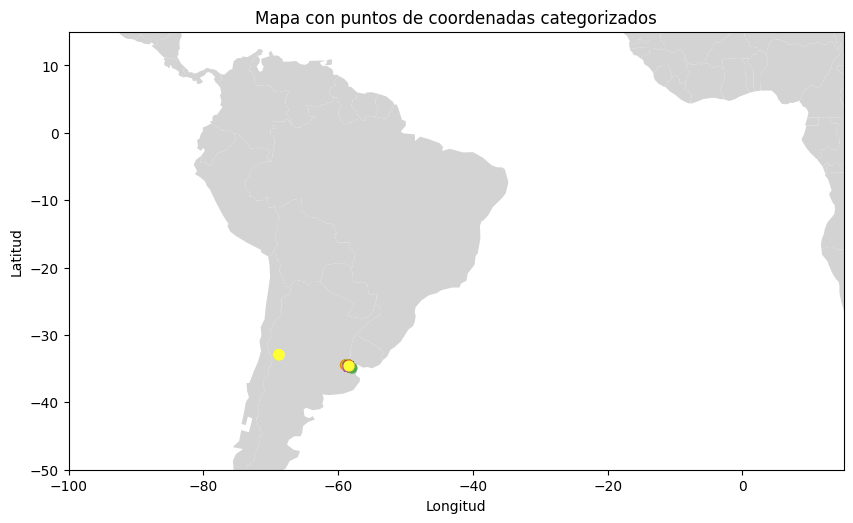

In [48]:
df_mapa = df_5[['localidad','latitud','longitud']].copy()
df_mapa = df_5[df_5['localidad'].isin(df_5.localidad.unique())]

# Convertir el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapa, geometry=gpd.points_from_xy(df_mapa.longitud, df_mapa.latitud))

# Descargar un mapa base
world = gpd.read_file('./mapa/ne_110m_admin_0_countries.shp')

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 40))

# Ploteamos el mapa base
world.plot(ax=ax, color='lightgray')

# Ploteamos los puntos, diferenciados por categoría con colores
gdf.plot(ax=ax, column='localidad', legend=False, cmap='Set1', markersize=50)

ax.set_xlim(-100,15)
ax.set_ylim(-50,15)

plt.title('Mapa con puntos de coordenadas categorizados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [122]:
# Podemos observar que existen coordenadas que se encuentra fuera de la provincia de Buenos Aires.
# Vamos a ver si podemos obtener correctamente las coordenadas
df_5[(df_5.longitud<-65)]

,iddomicilioorden,direccion,provincia,municipio,localidad,mes,InicioHorario1,FinHorario1,latitud,longitud,cliente,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaHora,VisitaFecha,VisitaHora_Inicio,VisitaHora_Fin
26797,177937,Florida 832,Mendoza,Guaymallén,Rodeo de la Cruz,Junio,901,1401,-32.935023,-68.74392,20,12.0,12.0,12,2024-06-03,12:20:00,2024-06-03,16:13:00,16:13:00
26798,177937,Florida 832,Mendoza,Guaymallén,Rodeo de la Cruz,Junio,901,1401,-32.935023,-68.74392,20,12.0,12.0,12,2024-06-03,12:20:00,2024-06-03,16:13:00,16:13:00
26799,177938,FLORIDA 526,Mendoza,Guaymallén,Rodeo de la Cruz,Junio,901,1401,-32.935023,-68.74392,20,12.0,12.0,12,2024-06-03,12:22:00,2024-06-03,16:13:00,16:13:00
26800,177938,FLORIDA 526,Mendoza,Guaymallén,Rodeo de la Cruz,Junio,901,1401,-32.935023,-68.74392,20,12.0,12.0,12,2024-06-03,12:22:00,2024-06-03,16:13:00,16:13:00


In [81]:
i = df_5[(df_5.longitud<-65)].index
print(i)
df_5 = df_5.drop([26795, 26796, 26797, 26798, 26799, 26800])

Index([26795, 26796, 26797, 26798, 26799, 26800], dtype='int64')


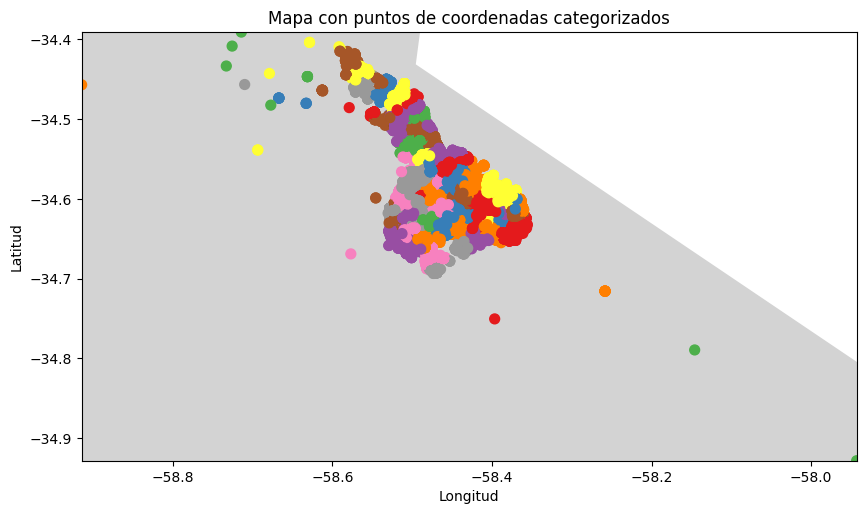

In [82]:
df_mapa = df_5[['localidad','latitud','longitud']].copy()
df_mapa = df_5[df_5['localidad'].isin(df_5.localidad.unique())]

# Convertimos el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapa, geometry=gpd.points_from_xy(df_mapa.longitud, df_mapa.latitud))

# Utilizamos un mapa base
world = gpd.read_file('./mapa/ne_110m_admin_0_countries.shp')

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 40))

# Ploteamos el mapa base
world.plot(ax=ax, color='lightgray')

# Ploteamos los puntos, diferenciados por categoría con colores
gdf.plot(ax=ax, column='localidad', legend=False, cmap='Set1', markersize=50)

ax.set_xlim(df_5.longitud.min(),df_5.longitud.max())
ax.set_ylim(df_5.latitud.min(),df_5.latitud.max())

# Mostramos el gráfico
plt.title('Mapa con puntos de coordenadas categorizados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

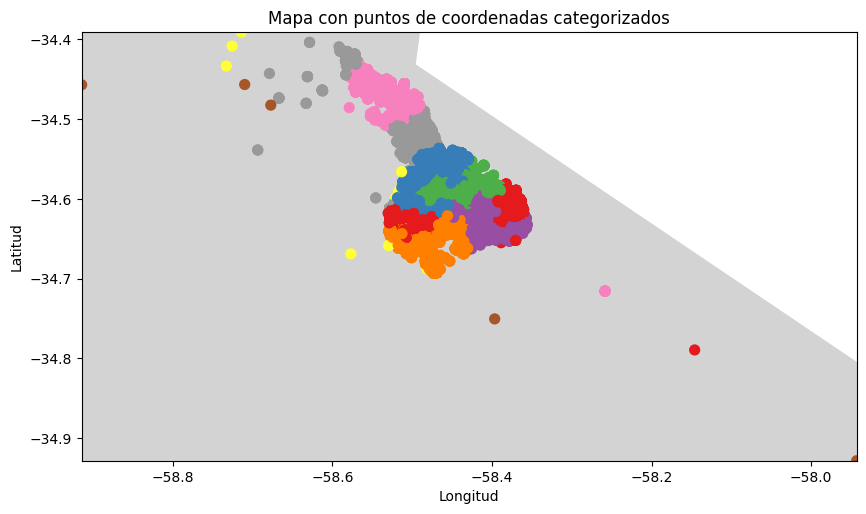

In [83]:
df_mapa = df_5[['municipio','latitud','longitud']].copy()
df_mapa = df_5[df_5['municipio'].isin(df_5['municipio'].unique())]

# Convertimos el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(df_mapa, geometry=gpd.points_from_xy(df_mapa['longitud'], df_mapa['latitud']))

# Utilizamos un mapa base
world = gpd.read_file('./mapa/ne_110m_admin_0_countries.shp')

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 40))

# Ploteamos el mapa base
world.plot(ax=ax, color='lightgray')

# Ploteamos los puntos, diferenciados por categoría con colores
gdf.plot(ax=ax, column='municipio', legend=False, cmap='Set1', markersize=50)

ax.set_xlim(df_5['longitud'].min(),df_5['longitud'].max())
ax.set_ylim(df_5['latitud'].min(),df_5['latitud'].max())

# Mostramos el gráfico
plt.title('Mapa con puntos de coordenadas categorizados')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [84]:
df_5.tail()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin
27479,183140,CASTILLO 767,Ciudad Autónoma de Buenos Aires,Comuna 15,Villa Crespo,901,1401,-34.593083,-58.436314,20,...,2.00,10.800,2,2024-08-01,Thursday,12:52:00,2024-08-01,Thursday,15:51:49,15:56:37
27480,183141,ARENALES 2699,Ciudad Autónoma de Buenos Aires,Comuna 2,Recoleta,901,1401,-34.592476,-58.404052,20,...,2.00,13.000,2,2024-07-31,Wednesday,12:30:00,2024-07-31,Wednesday,12:24:53,12:25:53
27481,183274,OLAZABAL 2572,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.561181,-58.459866,70,...,2.15,8.243,29,2024-08-01,Thursday,12:10:00,2024-08-01,Thursday,13:09:13,13:22:13
27482,183276,GUAMINI 2121,Ciudad Autónoma de Buenos Aires,Comuna 9,Mataderos,901,1401,-34.661128,-58.511529,20,...,3.00,26.000,3,2024-08-01,Thursday,12:20:00,2024-08-01,Thursday,13:26:20,13:34:32
27483,183277,AV. CALLAO 453,Ciudad Autónoma de Buenos Aires,Comuna 1,San Nicolás,901,1401,-34.603752,-58.392250,20,...,2.00,11.900,2,2024-08-01,Thursday,12:19:00,2024-08-01,Thursday,10:34:29,10:42:49


In [85]:
# Creamos una columna que nos dice el día en el que ocurrió cada envío
df_5['VisitaPlanificadaFecha'] = pd.to_datetime(df_5['VisitaPlanificadaFecha'])
df_5['VisitaPlanificadaDia'] = df_5['VisitaPlanificadaFecha'].dt.day_name()

df_5['VisitaFecha'] = pd.to_datetime(df_5['VisitaFecha'])
df_5['VisitaDia'] = df_5['VisitaFecha'].dt.day_name()
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.516667,24.910,30,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.866667,26.260,38,2024-05-10,Friday,12:05:00,2024-05-10,Friday,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.400000,24.888,32,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,1.800000,14.040,28,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.116667,14.377,31,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,15:36:00,15:36:00


In [86]:
df_5 = df_5[['iddomicilioorden',
            'direccion',
            'provincia',
            'municipio',
            'localidad',
            'InicioHorario1',
            'FinHorario1',
            'latitud',
            'longitud',
            'cliente',
            'mes',
            'Bultos',
            'Peso',
            'Unidades',
            'VisitaPlanificadaFecha',
            'VisitaPlanificadaDia',
            'VisitaPlanificadaHora',
            'VisitaFecha',
            'VisitaDia',
            'VisitaHora_Inicio',
            'VisitaHora_Fin',
            ]].copy()
df_5.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,Bultos,Peso,Unidades,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.516667,24.910,30,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.866667,26.260,38,2024-05-10,Friday,12:05:00,2024-05-10,Friday,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.400000,24.888,32,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,1.800000,14.040,28,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2.116667,14.377,31,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,15:36:00,15:36:00


In [87]:
df_5['provincia'].unique().tolist()

['Ciudad Autónoma de Buenos Aires', 'Buenos Aires']

In [57]:
df_5.isna().sum()

iddomicilioorden           0
direccion                  0
provincia                  0
municipio                  0
localidad                  0
InicioHorario1             0
FinHorario1                0
latitud                    0
longitud                   0
cliente                    0
mes                       52
Bultos                     0
Peso                       0
Unidades                   0
VisitaPlanificadaFecha     0
VisitaPlanificadaDia       0
VisitaPlanificadaHora      0
VisitaFecha               52
VisitaDia                 52
VisitaHora_Inicio         52
VisitaHora_Fin            52
dtype: int64

<hr></hr>

# Guardado del dataframe

Guardamos el dataframe limpio en un csv para utilizarlo para el análisis de los datos

In [88]:
df_5.to_csv('iFlowDatos_Limpios.csv', index=False)